In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import svm
from matplotlib.colors import ListedColormap

In [3]:
####Following are the questions:

#1. Find % of total applicants for each unique value of dependents
#2. Find the average number of dependents per applicant
#3. Find the %of applications approved for self-employed applicants
#4. What is the % of rejections for married male applicants
#5. Which property area has the maximum approval ratio
#6. Find average dependents per income group
#7. Create a simple predictive model to assess whether a loan application will be approved or rejected and provide the accuracy score
#approved cou and rejected

In [8]:
#To read json data
import json
f = open('C:/Users/srkpo/Documents/python_ml/loan_data.json')
 
# returns JSON object as
# a dictionary
data = json.load(f)
# Iterating through the json
# list
data

[{'Application_ID': 'LP001002',
  'Gender': 'Male',
  'Married': 'No',
  'Dependents': '0',
  'Education': 'Graduate',
  'Self_Employed': 'No',
  'Credit_History': 1,
  'Property_Area': 'Urban',
  'Income': 'medium',
  'Application_Status': 'Y'},
 {'Application_ID': 'LP001003',
  'Gender': 'Male',
  'Married': 'Yes',
  'Dependents': '1',
  'Education': 'Graduate',
  'Self_Employed': 'No',
  'Credit_History': 1,
  'Property_Area': 'Rural',
  'Income': 'medium',
  'Application_Status': 'N'},
 {'Application_ID': 'LP001005',
  'Gender': 'Male',
  'Married': 'Yes',
  'Dependents': '0',
  'Education': 'Graduate',
  'Self_Employed': 'Yes',
  'Credit_History': 1,
  'Property_Area': 'Urban',
  'Income': 'low',
  'Application_Status': 'Y'},
 {'Application_ID': 'LP001006',
  'Gender': 'Male',
  'Married': 'Yes',
  'Dependents': '0',
  'Education': 'Not Graduate',
  'Self_Employed': 'No',
  'Credit_History': 1,
  'Property_Area': 'Urban',
  'Income': 'low',
  'Application_Status': 'Y'},
 {'Applica

In [10]:
#convert list into dataframe
loan_df = pd.DataFrame.from_dict(data)
loan_df.head()
#loan_df["Application_Status"].value_counts()
#loan_df.dtypes

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,LP001002,Male,No,0,Graduate,No,1,Urban,medium,Y
1,LP001003,Male,Yes,1,Graduate,No,1,Rural,medium,N
2,LP001005,Male,Yes,0,Graduate,Yes,1,Urban,low,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1,Urban,low,Y
4,LP001008,Male,No,0,Graduate,No,1,Urban,medium,Y


In [188]:
#check null values
loan_df.isnull().sum()

Application_ID        0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Credit_History        0
Property_Area         0
Income                0
Application_Status    0
dtype: int64

In [12]:
# property and marriedstatus approval and reject count
proper_table=pd.pivot_table(data=loan_df,index=['Married','Property_Area','Application_Status'],values='Application_ID',aggfunc=['count'])
proper_table
array=[0,1,0,0,1,1,0,0,0,0]


count
                                         Application_ID
Married Property_Area Application_Status               
No      Rural         N                              22
                      Y                              34
        Semiurban     N                              21
                      Y                              47
        Urban         N                              26
                      Y                              30
Yes     Rural         N                              37
                      Y                              56
        Semiurban     N                              23
                      Y                             106
        Urban         N                              35
                      Y                              74

In [216]:
# Check the no of applicants in each group of dependents
table = pd.pivot_table(data=loan_df, index=['Dependents'],values='Application_ID',aggfunc=['count'])
table.dtypes

#Calculate percentage in each group of dependents

table['% of Total'] = (table['count']/table['count'].sum())*100
table

,count,% of Total
,Application_ID,
Dependents,,
0,294,57.534247
1,85,16.634051
2,88,17.221135
3+,44,8.610568


In [217]:
#Average no of dependents per applicant
# making categorical variable to numeric for computation
loan_df['Dependentlvl'] = pd.factorize(loan_df.Dependents)[0]

applicant_table = pd.pivot_table(data=loan_df, index=['Application_ID'],values='Dependentlvl',aggfunc=['mean'])

applicant_table

,mean
,Dependentlvl
Application_ID,
LP001002,0
LP001003,1
LP001005,0
LP001006,0
LP001008,0
...,...
LP002978,0
LP002979,3


In [218]:
# Find the %of applications approved for self-employed applicants
table1 = pd.pivot_table(data=loan_df, index=['Self_Employed'],values='Application_Status',aggfunc=['count'])
table1
#Calculate percentage in each group of dependents

table1['% of Applications'] = (table1['count']/table1['count'].sum())*100
table1
#Approvaltable = pd.pivot_table(data=loan_df, index=['Self-Employed'],values='Application_Status',aggfunc=['count'])

,count,% of Applications
,Application_Status,
Self_Employed,,
No,441,86.30137
Yes,70,13.69863


In [219]:
#What is the % of rejections for married male applicants
table2 = pd.pivot_table(data=loan_df, index=['Gender','Married'],values='Application_Status',aggfunc=['count'])
table2['% of married Applications'] = (table2['count']/table2['count'].sum())*100

table2

count % of married Applications
               Application_Status                          
Gender Married                                             
Female No                      66                 12.915851
       Yes                     25                  4.892368
Male   No                     114                 22.309198
       Yes                    306                 59.882583

In [220]:
#Which property area has the maximum approval ratio
property_table2 = pd.pivot_table(data=loan_df, index=['Application_Status','Property_Area'],values='Application_ID',aggfunc=['count'])
 
property_table2

property_table2['ratio']=(property_table2['count']/property_table2['count'].sum())
property_table2
#from table semiurban has maximum approval

count     ratio
                                 Application_ID          
Application_Status Property_Area                         
N                  Rural                     59  0.115460
                   Semiurban                 44  0.086106
                   Urban                     61  0.119374
Y                  Rural                     90  0.176125
                   Semiurban                153  0.299413
                   Urban                    104  0.203523

In [221]:
#Find average dependents per income group
#Pivot table to find average dependents for each level of income
income_table = pd.pivot_table(data=loan_df, index=['Income'],values='Dependentlvl',aggfunc=['mean','sum'])
income_table['Average']=(income_table['sum']/income_table['sum'].count())
income_table


,mean,sum,Average
,Dependentlvl,Dependentlvl,
Income,,,
high,0.888889,40,13.333333
low,0.641026,175,58.333333
medium,0.922280,178,59.333333


In [222]:
# ID cnnot be taken as feature for the prediction model

loan_df.drop(['Application_ID','Dependentlvl'],axis=1, inplace=True)

In [223]:
# Converting categorical variables to numeric using encoding method
data = loan_df.apply(LabelEncoder().fit_transform)

In [224]:
data.tail()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
506,0,0,0,0,0,1,0,1,1
507,1,1,3,0,0,1,0,2,1
508,1,1,1,0,0,1,2,2,1
509,1,1,2,0,0,1,2,2,1
510,0,0,0,0,1,0,1,2,0


In [225]:
data.corr(method="pearson")

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
Gender,1.000000,0.363499,0.200692,0.044667,-0.007948,0.024682,-0.020576,0.060890,0.052533
Married,0.363499,1.000000,0.375597,-0.002516,0.019750,0.020519,0.029479,-0.019007,0.098560
Dependents,0.200692,0.375597,1.000000,0.039250,0.051180,-0.039492,-0.000748,0.075123,0.016984
Education,0.044667,-0.002516,0.039250,1.000000,-0.014796,-0.075720,-0.033095,-0.022029,-0.088699
Self_Employed,-0.007948,0.019750,0.051180,-0.014796,1.000000,-0.016306,-0.052259,-0.011734,-0.018705
Credit_History,0.024682,0.020519,-0.039492,-0.075720,-0.016306,1.000000,-0.003404,0.018913,0.545934
Property_Area,-0.020576,0.029479,-0.000748,-0.033095,-0.052259,-0.003404,1.000000,-0.079382,0.016778
Income,0.060890,-0.019007,0.075123,-0.022029,-0.011734,0.018913,-0.079382,1.000000,0.044086
Application_Status,0.052533,0.098560,0.016984,-0.088699,-0.018705,0.545934,0.016778,0.044086,1.000000


<AxesSubplot:>

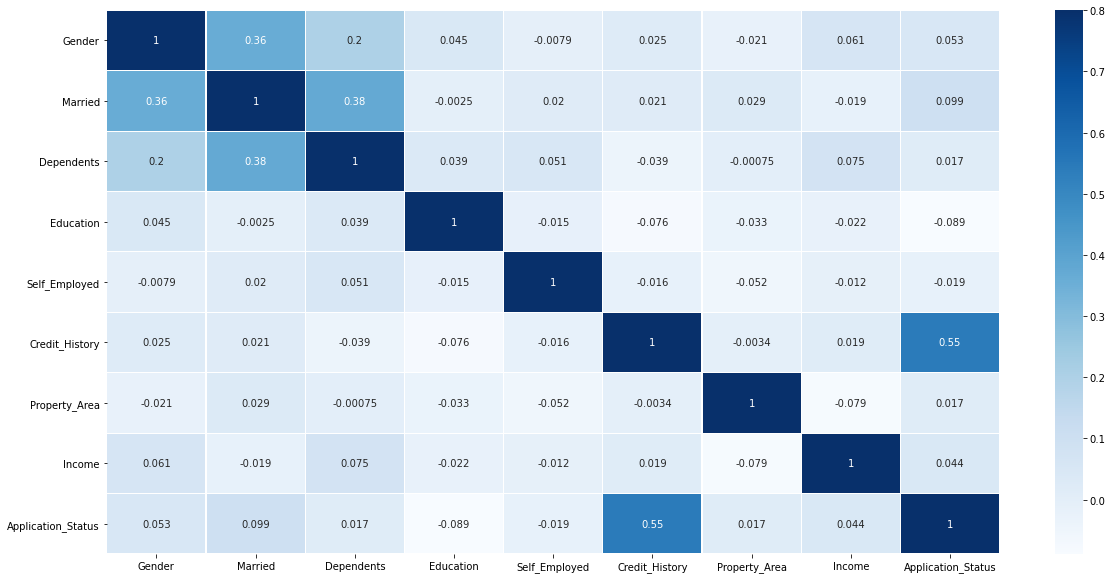

In [245]:
f, ax = plt.subplots(figsize=(20, 10))

sns.heatmap(data.corr(method="pearson"), linewidths=0.1, cmap = plt.cm.Blues, linecolor = 'White', vmax=0.8, annot=True)

In [246]:
## From the heat map and correlation method, features are not correlated to each other.

In [247]:
list(data)[:-1]

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area',
 'Income']

In [248]:
X = data[list(data)[:-1]]
y = data["Application_Status"]

In [268]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.33, random_state=42)

In [269]:
#Model on training data
clf = LogisticRegression()
clf.fit(X_train, y_train)
# Get predictions using the trained model
y_pred = clf.predict(X_test)


In [270]:
# Accuracy on test data
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.834319526627219


In [271]:
confusion_matrix(y_test, y_pred)

array([[ 27,  27],
       [  1, 114]], dtype=int64)

In [272]:
# Using SVM as classifier
classifier = svm.SVC(kernel='linear')

In [273]:
#training the support Vector Macine model
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [274]:
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred,y_test)

In [275]:
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.834319526627219
